In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

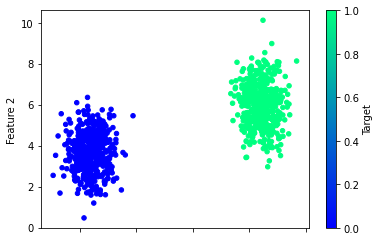

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics

nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Fit the model to the training data

fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 1.3757 - accuracy: 0.0267 
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 1.3248 - accuracy: 0.0280
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 1.2785 - accuracy: 0.0293
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 1.2341 - accuracy: 0.0293
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 1.1938 - accuracy: 0.0267
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 1.1561 - accuracy: 0.0280
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 1.1206 - accuracy: 0.0293
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 1.0882 - accuracy: 0.0373
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 1.0578 - accuracy: 0.0453
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 1.0304 - accuracy: 0.0547
Epoch 11

24/24 [==============================] - 0s 4ms/step - loss: 0.6937 - accuracy: 0.4973
Epoch 84/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6937 - accuracy: 0.4987
Epoch 85/100
24/24 [==============================] - 0s 5ms/step - loss: 0.6936 - accuracy: 0.4987
Epoch 86/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6936 - accuracy: 0.4987
Epoch 87/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6936 - accuracy: 0.5000
Epoch 88/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6936 - accuracy: 0.5000
Epoch 89/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5013
Epoch 90/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5013
Epoch 91/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5013
Epoch 92/100
24/24 [==============================] - 0s 5ms/step - loss: 0.6935 - accuracy: 0.5013
Epoch 93/100


<AxesSubplot:>

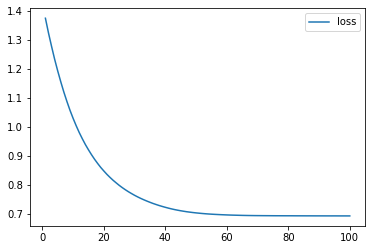

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")


<AxesSubplot:>

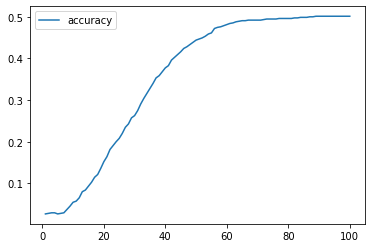

In [12]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [13]:
# Evaluate the model using the test data

model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.6940 - accuracy: 0.4760 - 303ms/epoch - 38ms/step
Loss: 0.6940147280693054, Accuracy: 0.47600001096725464


In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

1/1 [==============================] - 0s 114ms/step


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

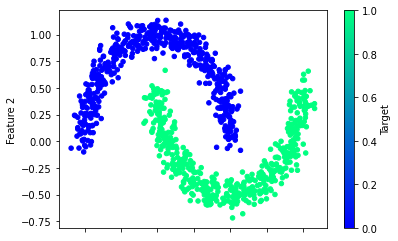

In [15]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [16]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [17]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)


Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.6921 - accuracy: 0.5360
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5347
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.5360
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5373
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.5413
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.5453
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.5560
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.5720
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.5907
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.6173
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.3146 - accuracy: 0.8893
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3133 - accuracy: 0.8893
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3121 - accuracy: 0.8893
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3109 - accuracy: 0.8893
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3098 - accuracy: 0.8893
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3088 - accuracy: 0.8893
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3077 - accuracy: 0.8893
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3066 - accuracy: 0.8893
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3057 - accuracy: 0.8893
Epoch 92/100
24/24 [==============================] - 0s 5ms/step - loss: 0.3047 - accuracy: 0.8893
Epoch 93/100


<AxesSubplot:>

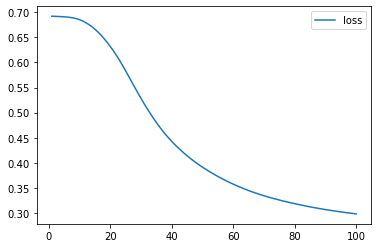

In [18]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

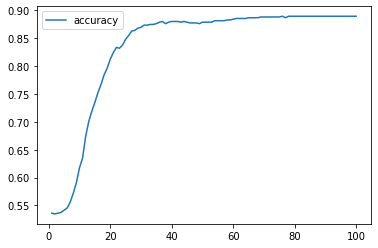

In [19]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [20]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [21]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [22]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 1s 3ms/step - loss: 0.9167 - accuracy: 0.3387
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8660 - accuracy: 0.3693
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8219 - accuracy: 0.4080
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7814 - accuracy: 0.4387
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7463 - accuracy: 0.4960
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7138 - accuracy: 0.5307
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6835 - accuracy: 0.5160
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6543 - accuracy: 0.5307
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6257 - accuracy: 0.5853
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5978 - accuracy: 0.6427
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.2320 - accuracy: 0.8987
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2318 - accuracy: 0.8987
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2315 - accuracy: 0.8987
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2312 - accuracy: 0.8987
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2308 - accuracy: 0.8987
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2304 - accuracy: 0.8987
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2301 - accuracy: 0.8987
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2299 - accuracy: 0.8987
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2295 - accuracy: 0.8987
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2292 - accuracy: 0.8987
Epoch 93/100
